# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [3]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [31]:
baby_names = pd.read_csv("lab12_files/US_Baby_names_right.csv")

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [10]:
baby_names.head()
baby_names.tail() #1016394 rekordów

,Unnamed: 0,Id,Name,Year,Gender,State,Count
1016390,5647421,5647422,Seth,2014,M,WY,5
1016391,5647422,5647423,Spencer,2014,M,WY,5
1016392,5647423,5647424,Tyce,2014,M,WY,5
1016393,5647424,5647425,Victor,2014,M,WY,5
1016394,5647425,5647426,Waylon,2014,M,WY,5


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [11]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [32]:
del baby_names['Unnamed: 0']
del baby_names['Id']
baby_names.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [38]:
gender_counts = baby_names['Gender'].value_counts()
if gender_counts['F'] > gender_counts['M']: print("Female") 
else: print("Male")

Female


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [41]:
gender_counts = baby_names['Name'].value_counts()
print(gender_counts[0:10])

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Dakota     962
Name: count, dtype: int64


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

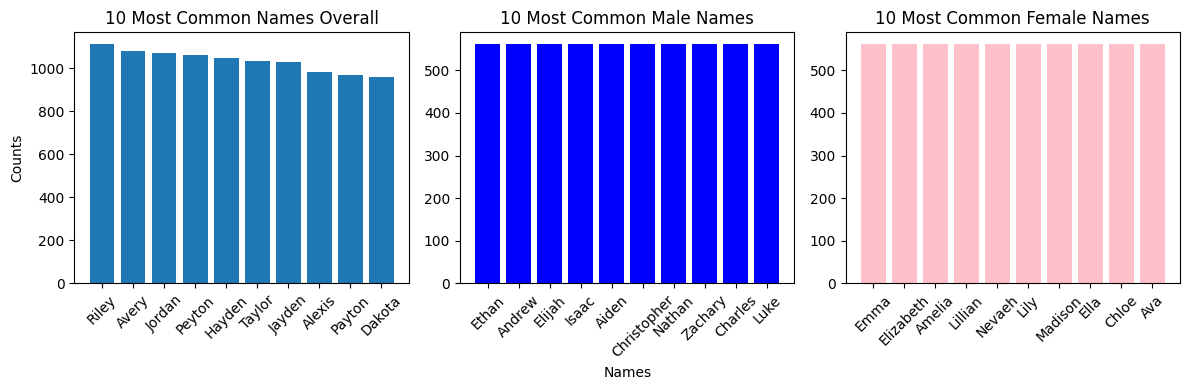

In [53]:
most_common_names_overall = baby_names['Name'].value_counts()[0:10]
most_common_names_male = baby_names[baby_names['Gender'] == 'M']['Name'].value_counts()[0:10]
most_common_names_female = baby_names[baby_names['Gender'] == 'F']['Name'].value_counts()[0:10]

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4)) 

plt.subplot(1, 3, 1) 
plt.bar(most_common_names_overall.index, most_common_names_overall.values)
plt.title('10 Most Common Names Overall')
plt.ylabel('Counts')
plt.xticks(rotation=45)


plt.subplot(1, 3, 2) 
plt.bar(most_common_names_male.index, most_common_names_male.values, color='blue')
plt.title('10 Most Common Male Names')
plt.xlabel('Names')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)  
plt.bar(most_common_names_female.index, most_common_names_female.values, color='pink')
plt.title('10 Most Common Female Names')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()





Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [57]:
print(len(list(set(baby_names['Name']))))

17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [62]:
name_counts = baby_names['Name'].value_counts()

total_names = name_counts.sum()

name_probabilities = name_counts / total_names

import numpy as np

def generate_name():
    return np.random.choice(name_probabilities.index, p=name_probabilities.values)

for _ in range(10):
    print(generate_name())


Annalise
Mateo
Serena
Kaden
Gabriela
Archie
Ellen
Malakhi
Taniyah
Lebron


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [74]:
most_common_name = baby_names['Name'].value_counts().idxmax()

print(most_common_name)

name_counts = baby_names['Name'].value_counts()

mean = name_counts.mean()

median = name_counts.median()

std_dev = name_counts.std()

print(f"Najczęściej występujące imię: {most_common_name}")
print(f"Średnia liczba wystąpień: {mean}")
print(f"Mediana liczby wystąpień: {median}")
print(f"Odchylenie standardowe liczby wystąpień: {std_dev}")


Riley
Najczęściej występujące imię: Riley
Średnia liczba wystąpień: 57.644906987295826
Mediana liczby wystąpień: 8.0
Odchylenie standardowe liczby wystąpień: 122.0299635081389


## Część II

Krok 1: Wczytaj dane

In [95]:
df = pd.read_csv("lab12_files/ocupation.csv", delimiter='|')


Krok 2: Podejrzyj pierwsze 25 rekordów

In [96]:
df.head(25)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [97]:
df.tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [98]:
print("Obserwacji w zbiorze:" , len(df))
print("Kolumn w zbiorze:" , len(df.columns))

Obserwacji w zbiorze: 943
Kolumn w zbiorze: 5


Krok 5: Wypisz nazwy kolumn

In [106]:
for name in df.columns:
    print(name)

user_id
age
gender
occupation
zip_code


Krok 6: Ile różnych zawodów jest w zbiorze?

In [104]:
len(df.value_counts('occupation'))

21

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

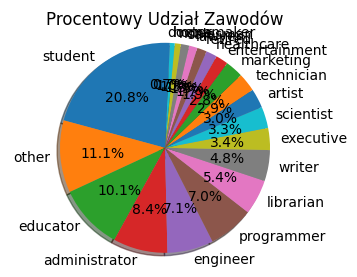

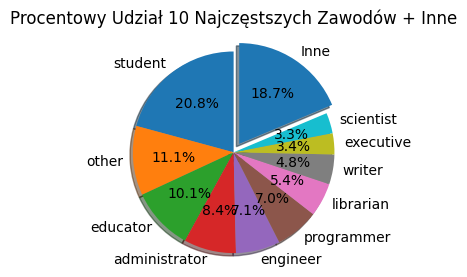

In [108]:
occupation_counts = df['occupation'].value_counts()

plt.figure(figsize=(4, 3))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Procentowy Udział Zawodów')
plt.axis('equal')
plt.show()

top_occupations = occupation_counts[:10]
other_count = occupation_counts[10:].sum()
top_occupations['Inne'] = other_count

explode = [0] * 10 + [0.1]

plt.figure(figsize=(4, 3))
plt.pie(top_occupations, explode=explode, labels=top_occupations.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Procentowy Udział 10 Najczęstszych Zawodów + Inne')
plt.axis('equal') 
plt.show()

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

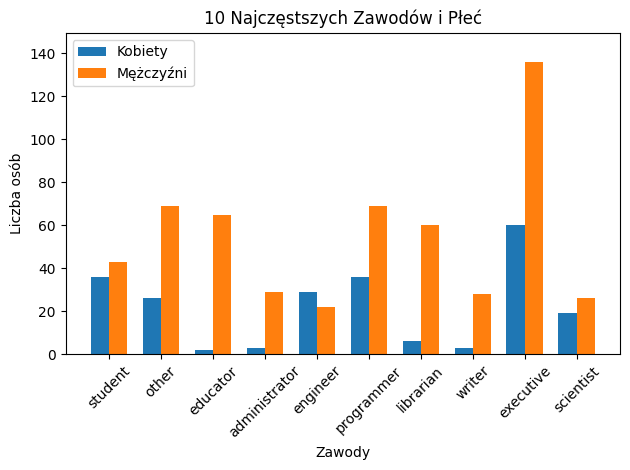

In [110]:

top_occupations = df['occupation'].value_counts().head(10).index
top_occupations_data = df[df['occupation'].isin(top_occupations)]

occupation_gender_counts = top_occupations_data.groupby(['occupation', 'gender']).size().unstack().fillna(0)

bar_width = 0.35

index = np.arange(len(top_occupations))

bar1 = plt.bar(index, occupation_gender_counts['F'], bar_width, label='Kobiety')
bar2 = plt.bar(index + bar_width, occupation_gender_counts['M'], bar_width, label='Mężczyźni')

plt.xlabel('Zawody')
plt.ylabel('Liczba osób')
plt.title('10 Najczęstszych Zawodów i Płeć')

plt.legend()

plt.xticks(index + bar_width / 2, top_occupations, rotation=45)


plt.ylim(0, max(occupation_gender_counts['F'].max(), occupation_gender_counts['M'].max()) * 1.1)


plt.tight_layout()
plt.show()

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

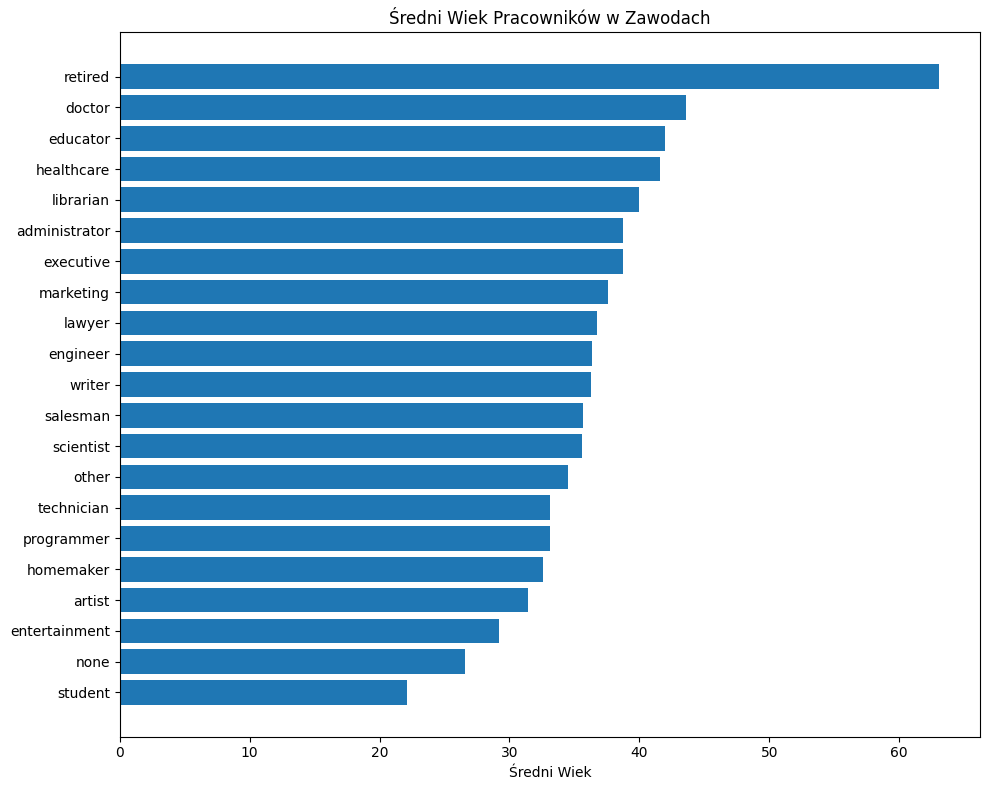

In [111]:
average_age_per_occupation = df.groupby('occupation')['age'].mean().sort_values()

plt.figure(figsize=(10, 8)) 
plt.barh(average_age_per_occupation.index, average_age_per_occupation.values) 


plt.xlabel('Średni Wiek')
plt.title('Średni Wiek Pracowników w Zawodach')


plt.tight_layout()  
plt.show()

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.


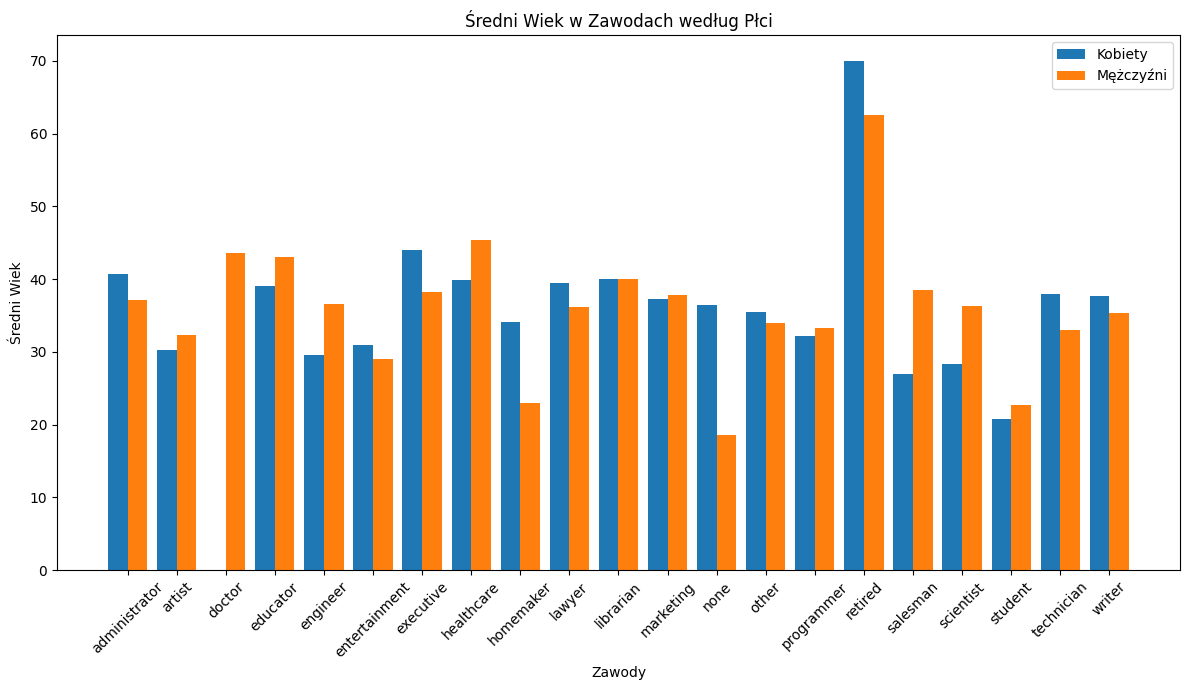

In [112]:
average_age_by_gender = df.groupby(['occupation', 'gender'])['age'].mean().unstack()


bar_width = 0.4
index = np.arange(len(average_age_by_gender))

fig, ax = plt.subplots(figsize=(12, 7))


bar1 = ax.bar(index - bar_width/2, average_age_by_gender['F'], bar_width, label='Kobiety')


bar2 = ax.bar(index + bar_width/2, average_age_by_gender['M'], bar_width, label='Mężczyźni')


ax.set_xlabel('Zawody')
ax.set_ylabel('Średni Wiek')
ax.set_title('Średni Wiek w Zawodach według Płci')
ax.set_xticks(index)
ax.set_xticklabels(average_age_by_gender.index, rotation=45)


ax.legend()

plt.tight_layout()
plt.show()
